In [161]:
%matplotlib inline

In [162]:
import torch
import torchvision
import torchvision.transforms as transforms

In [163]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


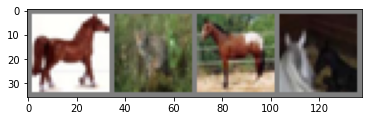

horse   cat horse horse


In [164]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [165]:
import numpy as np #for numerical computations
import pandas as pd #for dataframe operations

from matplotlib import pyplot as plt #for viewing images and plots
%matplotlib inline 
#So that Matplotlib plots don't open in separate windows outside the notebook

import urllib #For fetching data from Web URLs

import cv2   #For image processing

from sklearn.preprocessing import LabelEncoder    #For encoding categorical variables
from sklearn.model_selection import train_test_split #For splitting of dataset

#All tensorflow utilities for creating, training and working with a CNN
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [166]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [167]:
def image_processing(images):
  #Download from image url and import it as a numpy array
  response = urllib.request.urlopen(images)
  image = np.asarray(bytearray(response.read()), dtype="uint8")                         

  #Read the numpy arrays as color images in OpenCV
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)

  #Convert to HSV for creating a mask
  image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

  #Convert to grayscale that will actually be used for training, instead of color image 
  image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

  #Create a mask that detects the red rectangular tags present in each image
  mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))

  #Get the coordinates of the red rectangle in the image, 
  #But take entire image if mask fails to detect the red rectangle
  if len(np.where(mask != 0)[0]) != 0:
    y1 = min(np.where(mask != 0)[0])
    y2 = max(np.where(mask != 0)[0])
  else:
    y1 = 0                                     
    y2 = len(mask)
  
  if len(np.where(mask != 0)[1]) != 0:
    x1 = min(np.where(mask != 0)[1])
    x2 = max(np.where(mask != 0)[1])
  else:
    x1 = 0
    x2 = len(mask[0])

  #Crop the grayscle image along those coordinates
  image_cropped = image_gray[y1:y2, x1:x2]

  #Resize the image to 100x100 pixels size
  image_100x100 = cv2.resize(image_cropped, (100, 100))

  #Save image as in form of array of 10000x1
  image_arr = image_100x100.flatten()
  return image_arr

In [168]:
print('All categories : \n ', classes)

All categories : 
  ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [169]:
n_classes = len(classes)
print('Total number of unique categories:', n_classes)

Total number of unique categories: 10


In [170]:
def image_processing(images):
  #Download from image url and import it as a numpy array
  response = urllib.request.urlopen(images)
  image = np.asarray(bytearray(response.read()), dtype="uint8")                         

  #Read the numpy arrays as color images in OpenCV
  image_bgr = cv2.imdecode(image, cv2.IMREAD_COLOR)

  #Convert to HSV for creating a mask
  image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

  #Convert to grayscale that will actually be used for training, instead of color image 
  image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

  #Create a mask that detects the red rectangular tags present in each image
  mask = cv2.inRange(image_hsv, (0,255,255), (0,255,255))

  #Get the coordinates of the red rectangle in the image, 
  #But take entire image if mask fails to detect the red rectangle
  if len(np.where(mask != 0)[0]) != 0:
    y1 = min(np.where(mask != 0)[0])
    y2 = max(np.where(mask != 0)[0])
  else:
    y1 = 0                                     
    y2 = len(mask)
  
  if len(np.where(mask != 0)[1]) != 0:
    x1 = min(np.where(mask != 0)[1])
    x2 = max(np.where(mask != 0)[1])
  else:
    x1 = 0
    x2 = len(mask[0])

  #Crop the grayscle image along those coordinates
  image_cropped = image_gray[y1:y2, x1:x2]

  #Resize the image to 100x100 pixels size
  image_100x100 = cv2.resize(image_cropped, (100, 100))

  #Save image as in form of array of 10000x1
  image_arr = image_100x100.flatten()
  return image_arr

In [171]:
pip install gdown

In [172]:
import gdown

url = 'https://drive.google.com/uc?id=1B6_rtcmGRy49hqpwoJT-_Ujnt6cYj5Ba'
output = 'X.npy'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1B6_rtcmGRy49hqpwoJT-_Ujnt6cYj5Ba
To: /content/X.npy
100%|██████████| 1.22G/1.22G [00:08<00:00, 137MB/s]


'X.npy'

In [173]:
X = np.load('/content/X.npy')
X[0:3]
X.shape

array([[0.29803922, 0.29803922, 0.29803922, ..., 0.60392157, 0.6       ,
        0.29803922],
       [0.4627451 , 0.29803922, 0.29803922, ..., 0.29803922, 0.29803922,
        0.29803922],
       [0.30196078, 0.29803922, 0.29803922, ..., 0.29803922, 0.29803922,
        0.29803922]])

(15189, 10000)

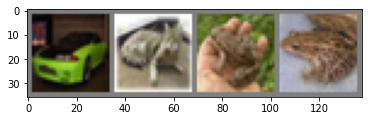

  car   cat  frog  frog


In [174]:
np.random.seed(len(classes))
for i in np.random.randint(0, len(X), 5):
# 학습용 이미지를 무작위로 가져오기
  dataiter = iter(trainloader)
  images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [175]:
encoder = LabelEncoder()
Targets = encoder.fit_transform(classes)
Targets
Targets.shape

array([7, 1, 0, 2, 3, 4, 5, 6, 8, 9])

(10,)

In [176]:
Y = to_categorical(Targets, num_classes = n_classes)
Y[0:3]
Y.shape

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

(10, 10)

In [177]:
#Segregation of a test set for testing on the trained model

X_test = X[14000:,]
Y_test = Y[14000:,]

#Seperation of a validation set from the remaing training set (required for validation while training)

X_train, X_val, Y_train, Y_val = train_test_split(X[:10,], Y[:10,], test_size=0.15, random_state=13)

In [178]:
#Reshape the input matrices such that each sample is three-dimensional

img_rows, img_cols = 100, 100
input_shape = (img_rows, img_cols, 1)

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_val.shape

(2, 100, 100, 1)

In [179]:
#Define a Convolutional Neural Network Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu',
                 input_shape = input_shape))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(n_classes, activation='softmax'))

learning_rate = 0.001

model.compile(loss = categorical_crossentropy,
              optimizer = Adam(learning_rate),
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 98, 98, 16)        160       
                                                                 
 batch_normalization_12 (Bat  (None, 98, 98, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 96, 96, 16)        2320      
                                                                 
 batch_normalization_13 (Bat  (None, 96, 96, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 48, 16)       0         
 2D)                                                             
                                                      

Epoch 1/15
1/1 [==============================] - 2s 2s/step - loss: 3.0521 - accuracy: 0.0000e+00 - val_loss: 2.3565 - val_accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 1s 504ms/step - loss: 1.4641 - accuracy: 0.7500 - val_loss: 2.3800 - val_accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 1s 566ms/step - loss: 4.4136 - accuracy: 0.6250 - val_loss: 2.4146 - val_accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 1s 545ms/step - loss: 4.4499 - accuracy: 0.6250 - val_loss: 2.4526 - val_accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 1s 602ms/step - loss: 0.0196 - accuracy: 1.0000 - val_loss: 2.4862 - val_accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 0s 454ms/step - loss: 3.9286 - accuracy: 0.7500 - val_loss: 2.5428 - val_accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 0s 456ms/step - loss: 0.5600 - accuracy: 0.7500 - val_loss: 2.6298 - val_accuracy: 0.

<Figure size 432x360 with 0 Axes>

Text(0.5, 1.0, 'Model Accuracy')

Text(0, 0.5, 'accuracy')

Text(0.5, 0, 'epoch')

(0.4, 0.9)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 10 Text major ticklabel objects>)

(array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 6 Text major ticklabel objects>)

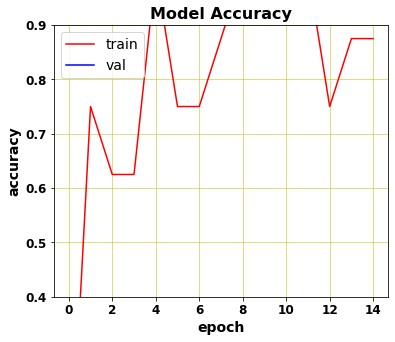

In [180]:
#Train the CNN

history = model.fit( X_train, Y_train, 
                    epochs = 15, batch_size = 100, 
                    callbacks=[save_best], verbose=1, 
                    validation_data = (X_val, Y_val))

# Plot the training history (Training accuracy & Validation accuracy)

plt.figure(figsize=(6, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy', weight='bold', fontsize=16)
plt.ylabel('accuracy', weight='bold', fontsize=14)
plt.xlabel('epoch', weight='bold', fontsize=14)
plt.ylim(0.4, 0.9)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')
plt.show()

In [181]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

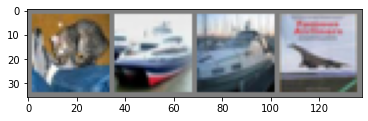

GroundTruth:    cat  ship  ship plane


In [182]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [183]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [184]:
outputs = net(images)

In [185]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird  bird  bird  bird


In [186]:
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [187]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print("Accuracy for class {:5s} is: {:.1f} %".format(classname,
                                                   accuracy))

Accuracy for class plane is: 0.0 %
Accuracy for class car   is: 0.0 %
Accuracy for class bird  is: 100.0 %
Accuracy for class cat   is: 0.0 %
Accuracy for class deer  is: 0.0 %
Accuracy for class dog   is: 0.0 %
Accuracy for class frog  is: 0.0 %
Accuracy for class horse is: 0.0 %
Accuracy for class ship  is: 0.0 %
Accuracy for class truck is: 0.0 %
